SALES PREDICTION USING PYTHON

BY ATHARVA DAHITULE

In [136]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')



In [137]:
df =pd.read_csv('Advertising.csv')

In [138]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [140]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [139]:
df.shape

(200, 5)

In [142]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [143]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [144]:
df.count()

Unnamed: 0    200
TV            200
Radio         200
Newspaper     200
Sales         200
dtype: int64

In [145]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [146]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [147]:
res = df.corr()
res

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


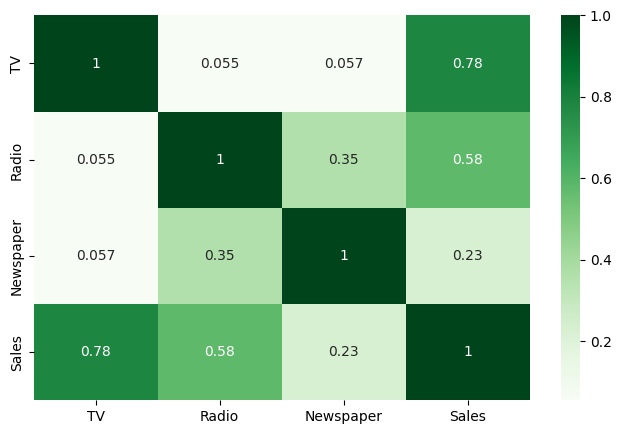

In [148]:
# Heatmap for co-relation
plt.figure(figsize=(8,5))
sns.heatmap(res,annot = True, cmap = 'Greens')
plt.show()


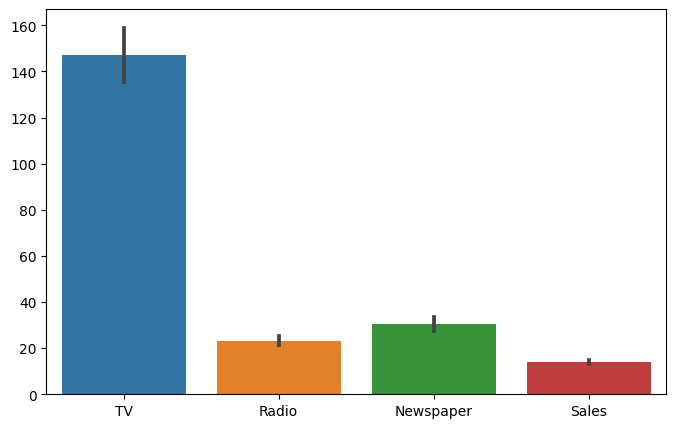

In [149]:
# Display using bar chart
plt.figure(figsize=(8,5))
sns.barplot(data = df)
plt.show()

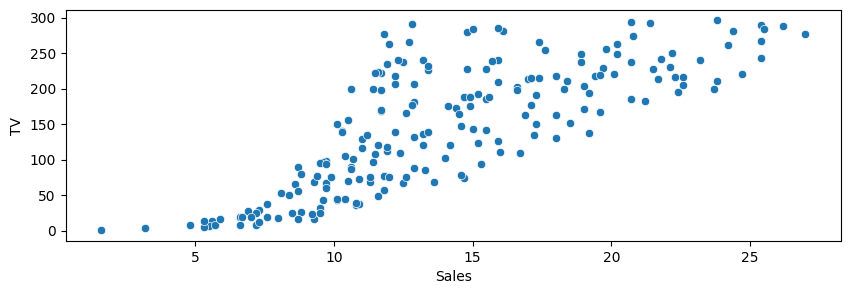

In [150]:
# Prediction for Sales VS TV
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = 'Sales', y = 'TV')
plt.show()

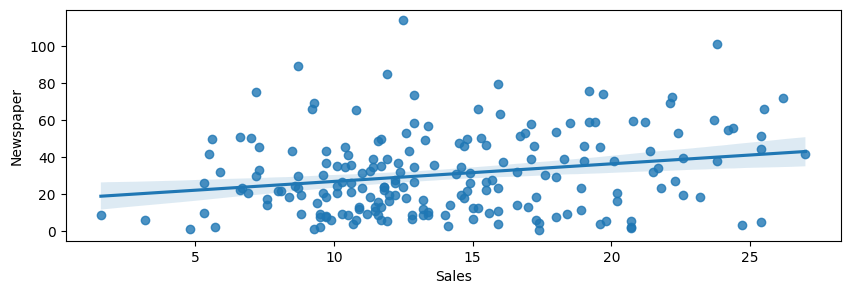

In [151]:
# Prediction for Sales VS Newspaper
plt.figure(figsize=(10,3))
sns.regplot(data = df, x = 'Sales', y = 'Newspaper',)
plt.show()

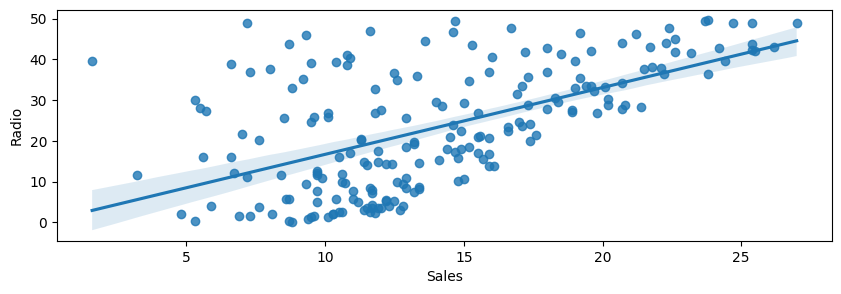

In [152]:
# Prediction for Sales VS Radio
plt.figure(figsize=(10,3))
sns.regplot(data = df, x = 'Sales', y = 'Radio')
plt.show()

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65, random_state=0)
model=LinearRegression()

model.fit(x_train,y_train)

y_predict=model.predict(x_test)
print(model.intercept_)
print(model.coef_)

2.848845981475902
[0.04441066 0.19656498 0.00357552]


In [154]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predict.flatten()
})

act_predict.head(50)

,Actual,Predict
0,11.3,10.017078
1,8.4,7.415322
2,8.7,7.005491
3,25.4,24.212379
4,11.7,12.066605
5,8.7,6.571338
6,7.2,13.115410
7,13.2,14.977876
8,9.2,11.040877
9,16.6,16.255128


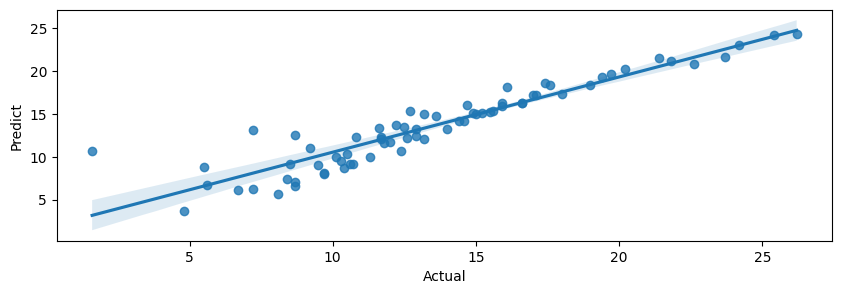

In [155]:
# Prediction for ACTUAL VS PREDICITED
plt.figure(figsize=(10,3))
sns.regplot(data=act_predict, x = 'Actual', y = 'Predict')
plt.show()

In [156]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("Mean_Square_Error:",mean_squared_error(y_test,y_predict))
print("Mean_Square_Absolute_Error:",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("R2_Score:",r2_score(y_test,y_predict))

Mean_absolute_error: 1.1772969293020834
Mean_Square_Error: 3.2848476202765773
Mean_Square_Absolute_Error: 1.085033146637504
R2_Score: 0.8715709300673591


# THE END